In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates, ticker
import datetime
import os

In [2]:
# ensure you have all modules installed in your kernel

# # import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install openpyxl
# !{sys.executable} -m pip install matplotlib

In [3]:
# parameters for ploting
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.linewidth"] = 1.5

In [4]:
# aux lists for plotting
statlist = ['Kills','Accur','ShotsF','ShotsH','Deaths','Stims','Accid','Samples'] # List of gathered stats
Enl = ['Automatons','Terminids','Illuminates']

In [5]:
# Importing Data from form submission
df = pd.read_csv('505thDataTemp - OrganisedData2.csv',header=0)
for stat in statlist:
    for i in range(1,4):
        df[stat+str(i)] = np.nan #creating columns for each stat in each mission

In [6]:
# defining function that sorts files by creation time
def sorted_directory_listing_by_creation_time_with_os_listdir(directory):
    def get_creation_time(item):
        item_path = os.path.join(directory, item)
        return os.path.getctime(item_path)

    items = os.listdir(directory)
    sorted_items = sorted(items, key=get_creation_time)
    return sorted_items

In [7]:
os.chdir(".\\All_Operations")
dflist = []
# df = pd.DataFrame(columns=nlist)
dpcounter = 0
for file in sorted_directory_listing_by_creation_time_with_os_listdir("."):
    df_aux = pd.read_excel(file,header=None,names=statlist).dropna(ignore_index=True).replace(r"%","", regex=True).replace(r",",".", regex=True).astype('float')
    Ndivers = 3 if len(file.split('_')) == 7 else 4
    Attendeescheck = df.at[dpcounter,'Host']+' '+df.at[dpcounter,'Attendee 1']+' '+df.at[dpcounter,'Attendee 2']+' '+df.at[dpcounter,'Attendee 3'] # checking if attendees are matching
    for j in range(Ndivers):
        if file.split('_')[j] not in Attendeescheck:
            print('Problem checking deployment ', str(dpcounter), ' Diver ',file.split('_')[j], 'not in ', Attendeescheck)
    c1 = 0
    c2 = 2
    for stat in statlist:
        for i in range(1,4):
            df.at[dpcounter,stat+str(i)] = df_aux[stat].iloc[c1:c2].sum() if stat != 'Accur' else df_aux[stat].iloc[c1:c2].mean()
    dpcounter += 1
os.chdir("..")

In [8]:
df['OperationStartTime'] = pd.to_datetime(df.OperationStartTime,dayfirst=True)
df['DateOnly'] = df.OperationStartTime.dt.date
df = df.sort_values('OperationStartTime').reset_index(drop=True)
for stat in statlist:
    if stat != 'Accur':
        df['Total'+stat] = df[stat+'1'] + df[stat+'2'] + df[stat+'3']
    else:
        df['Avg'+stat] = (df[stat+'1'] + df[stat+'2'] + df[stat+'3'])/3

In [9]:
#Extracting full data
df.to_csv('FullData.csv')

# Sample Data report - 505th Ressugence regiment
This report comprises Information gatehred from a few deployments form the 505th. The stats team thanks the collaboarion of hosts on supplying this data

# Deployment graphs

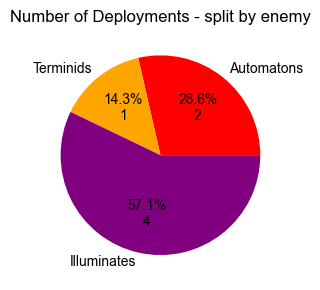

In [10]:
cl = ['red','orange','purple']
def func(pct, allvalues):
    absolute = int(pct / 100.*(np.sum(allvalues)+1))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig,ax = plt.subplots(figsize=(6,3))
plot1 = []
for i in range(3):
    plot1.append(len(df[df.Enemy==Enl[i]]))
ax.pie(plot1,labels=Enl,colors=cl,autopct=lambda pct: func(pct,plot1))
ax.set_title('Number of Deployments - split by enemy')

plt.tight_layout()

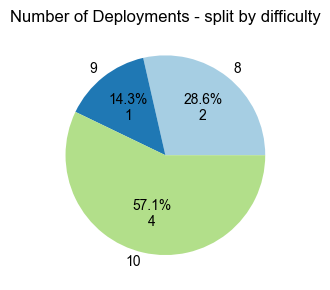

In [11]:
cl = ['red','orange','purple']
def func(pct, allvalues):
    absolute = int(pct / 100.*(np.sum(allvalues)+1))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig,ax = plt.subplots(figsize=(6,3))
plot1 = []
for i in range(8,11):
    plot1.append(len(df[df.Difficulty==i]))
ax.pie(plot1,labels=range(8,11),colors=plt.cm.Paired.colors,autopct=lambda pct: func(pct,plot1))
ax.set_title('Number of Deployments - split by difficulty')

plt.tight_layout()

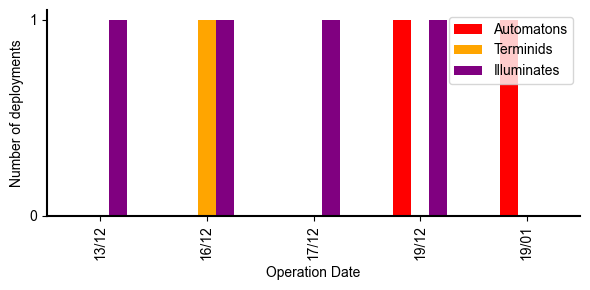

In [12]:
cl = ['red','orange','purple']
# fig,ax = plt.subplots(figsize=(6,3))
dfp = df.copy()
dfp.loc[dfp.Enemy=='Automatons','Automatons']=1
dfp.loc[dfp.Enemy=='Terminids','Terminids']=1
dfp.loc[dfp.Enemy=='Illuminates','Illuminates']=1
dfp=dfp.fillna(0)
dfp = dfp[['DateOnly','Automatons','Terminids','Illuminates']].groupby(by=['DateOnly']).sum()

ax = dfp.plot.bar(figsize=(6,3),color=cl)

ticks = [tick.get_text() for tick in ax.get_xticklabels()]
ticks = pd.to_datetime(ticks).strftime('%d/%m')
ax.set_xticklabels(ticks)

ax.set_xlabel('Operation Date')
ax.set_ylabel('Number of deployments')
ax.set_yticks([0,1])
ax.legend(loc='best')
# ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m"))
plt.tight_layout()

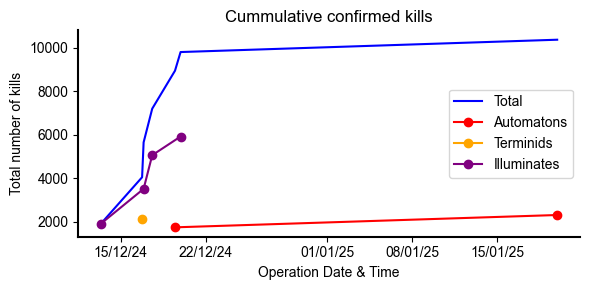

In [13]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.OperationStartTime,df.TotalKills.cumsum(),'-b',label='Total')
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    ax.plot(dfp.OperationStartTime,dfp.TotalKills.cumsum(),'o-',color=cl[i],label=Enl[i])
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Total number of kills')
ax.set_title('Cummulative confirmed kills')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.legend(loc='best')
plt.tight_layout()

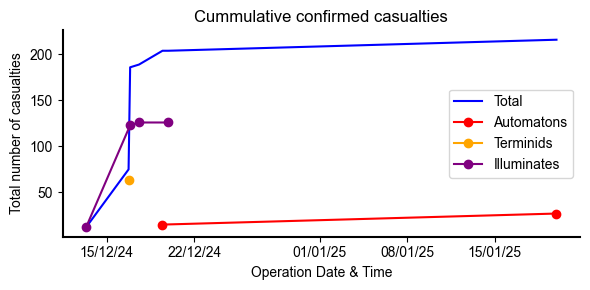

In [14]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.OperationStartTime,df.TotalDeaths.cumsum(),'-b',label='Total')
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    ax.plot(dfp.OperationStartTime,dfp.TotalDeaths.cumsum(),'o-',color=cl[i],label=Enl[i])
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Total number of casualties')
ax.set_title('Cummulative confirmed casualties')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.legend(loc='best')
plt.tight_layout()

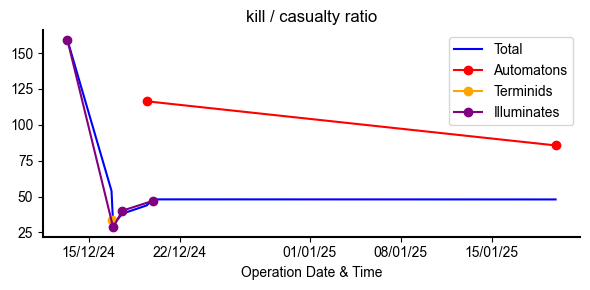

In [15]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.OperationStartTime,df.TotalKills.cumsum()/df.TotalDeaths.cumsum(),'-b',label='Total')
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    ax.plot(dfp.OperationStartTime,dfp.TotalKills.cumsum()/dfp.TotalDeaths.cumsum(),'o-',color=cl[i],label=Enl[i])
ax.set_xlabel('Operation Date & Time')
# ax.set_ylabel('Total number of kills')
ax.set_title('kill / casualty ratio')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.legend(loc='best')
plt.tight_layout()

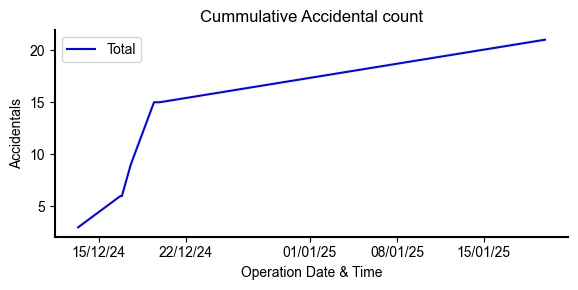

In [16]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.OperationStartTime,df.TotalAccid.cumsum(),'-b',label='Total')
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Accidentals')
ax.set_title('Cummulative Accidental count')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.legend(loc='best')
plt.tight_layout()

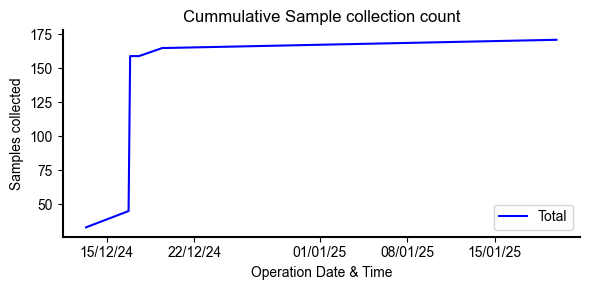

In [17]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.OperationStartTime,df.TotalSamples.cumsum(),'-b',label='Total')
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Samples collected')
ax.set_title('Cummulative Sample collection count')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.legend(loc='best')
plt.tight_layout()

# Data Statistics

In [18]:
print('Average Kills per Deployment (All three operations): '+ str(round(df.TotalKills.mean(),1))+' --- '+str(round(df.TotalKills.mean()/4,1))+' per helldiver')
print('Average Casualties per Deployment (All three operations): '+ str(round(df.TotalDeaths.mean(),1))+' --- '+str(round(df.TotalDeaths.mean()/4,1))+' per helldiver')
print('Average Kills/Casualty ratio: '+ str(round(df.TotalKills.mean()/df.TotalDeaths.mean(),1)))
print('Average Helldivers accuracy: '+ str(round(df.AvgAccur.mean(),1))+"%")

Average Kills per Deployment (All three operations): 1482.0 --- 370.5 per helldiver
Average Casualties per Deployment (All three operations): 30.9 --- 7.7 per helldiver
Average Kills/Casualty ratio: 48.0
Average Helldivers accuracy: 62.6%


 ### <span style="color:red">Automatons</span>

In [19]:
def prAut(skk): print("\033[91m {}\033[00m" .format(skk))
dfp = df[df.Enemy=='Automatons']
prAut('Average Kills per Deployment (All three operations): '+ str(round(dfp.TotalKills.mean(),1))+' --- '+str(round(dfp.TotalKills.mean()/4,1))+' per helldiver')
prAut('Average Casualties per Deployment (All three operations): '+ str(round(dfp.TotalDeaths.mean(),1))+' --- '+str(round(dfp.TotalDeaths.mean()/4,1))+' per helldiver')
prAut('Average Kills/Casualty ratio: '+ str(round(dfp.TotalKills.mean()/dfp.TotalDeaths.mean(),1)))
prAut('Average Helldivers accuracy: '+ str(round(dfp.AvgAccur.mean(),1))+"%")

 Average Kills per Deployment (All three operations): 1156.5 --- 289.1 per helldiver
 Average Casualties per Deployment (All three operations): 13.5 --- 3.4 per helldiver
 Average Kills/Casualty ratio: 85.7
 Average Helldivers accuracy: 65.6%


 ### <span style="color:Orange">Terminids</span>

In [20]:
def prTer(skk): print("\033[33m {}\033[00m" .format(skk))
dfp = df[df.Enemy=='Terminids']
prTer('Average Kills per Deployment (All three operations): '+ str(round(dfp.TotalKills.mean(),1))+' --- '+str(round(dfp.TotalKills.mean()/4,1))+' per helldiver')
prTer('Average Casualties per Deployment (All three operations): '+ str(round(dfp.TotalDeaths.mean(),1))+' --- '+str(round(dfp.TotalDeaths.mean()/4,1))+' per helldiver')
prTer('Average Kills/Casualty ratio: '+ str(round(dfp.TotalKills.mean()/dfp.TotalDeaths.mean(),1)))
prTer('Average Helldivers accuracy: '+ str(round(dfp.AvgAccur.mean(),1))+"%")

 Average Kills per Deployment (All three operations): 2139.0 --- 534.8 per helldiver
 Average Casualties per Deployment (All three operations): 63.0 --- 15.8 per helldiver
 Average Kills/Casualty ratio: 34.0
 Average Helldivers accuracy: 74.4%


 ### <span style="color:purple">Illuminates</span>

In [21]:
def prIll(skk): print("\033[95m {}\033[00m" .format(skk))
dfp = df[df.Enemy=='Illuminates']
prIll('Average Kills per Deployment (All three operations): '+ str(round(dfp.TotalKills.mean(),1))+' --- '+str(round(dfp.TotalKills.mean()/4,1))+' per helldiver')
prIll('Average Casualties per Deployment (All three operations): '+ str(round(dfp.TotalDeaths.mean(),1))+' --- '+str(round(dfp.TotalDeaths.mean()/4,1))+' per helldiver')
prIll('Average Kills/Casualty ratio: '+ str(round(dfp.TotalKills.mean()/dfp.TotalDeaths.mean(),1)))
prIll('Average Helldivers accuracy: '+ str(round(dfp.AvgAccur.mean(),1))+"%")

 Average Kills per Deployment (All three operations): 1480.5 --- 370.1 per helldiver
 Average Casualties per Deployment (All three operations): 31.5 --- 7.9 per helldiver
 Average Kills/Casualty ratio: 47.0
 Average Helldivers accuracy: 58.2%


In [ ]:
# To extract this report as an html file, use the following install nbconvert and use the following command: jupyter nbconvert --to html --no-input Statsreportv2.ipynb